In [6]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv('D:\\Subbu\\Learnings\\Data Science\\ML\\Practical\\Tasks\\Algerian Forest Fires\\Algerian_forest_fires_dataset_UPDATE.csv',skiprows = [0])

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [9]:
df.count()

day            246
month          245
year           245
Temperature    245
 RH            245
 Ws            245
Rain           245
FFMC           245
DMC            245
DC             245
ISI            245
BUI            245
FWI            245
Classes        244
dtype: int64

In [10]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31',
       'Sidi-Bel Abbes Region Dataset', 'day'], dtype=object)

There are break headers in the data like below

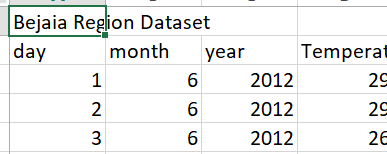
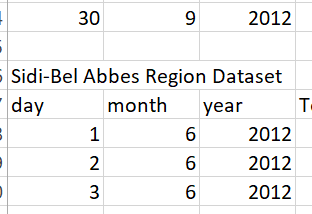

So we are removing all these junk headers to make Day column only have days

In [11]:
df = df[(df.day != 'Sidi-Bel Abbes Region Dataset')]
df = df[(df.day != 'day')]

In [12]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

Now we have only dates in Day column

In [13]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [14]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

We are renaming headers to have meaningful values.

In [15]:
df = df.rename(columns = {' RH':'Humidity','Ws':'Wind Speed', 'FFMC':'Fuel Moisture', 'DMC':'Duff Moisture', 'DC':'Drought', 'ISI':'Initial Speed Index', 'BUI':'Buildup Index', 'FWI':'Fire Weather Index', 'Classes  ':'Classes', 'Rain ':'Rain'})

In [16]:
df.count()

day                    244
month                  244
year                   244
Temperature            244
Humidity               244
 Ws                    244
Rain                   244
Fuel Moisture          244
Duff Moisture          244
Drought                244
Initial Speed Index    244
Buildup Index          244
Fire Weather Index     244
Classes                243
dtype: int64

In [17]:
df.shape

(244, 14)

In [18]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'Humidity', ' Ws', 'Rain',
       'Fuel Moisture', 'Duff Moisture', 'Drought', 'Initial Speed Index',
       'Buildup Index', 'Fire Weather Index', 'Classes'],
      dtype='object')

In [19]:
df.describe()

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index,Classes
count,244,244,244,244,244,244,244,244,244,244,244,244,244,243
unique,31,4,1,19,62,18,39,173,166,198,106,174,127,8
top,01,07,2012,35,64,14,0,88.9,7.9,8,1.1,3,0.4,fire
freq,8,62,244,29,10,43,133,8,5,5,8,5,12,131


In [20]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

In [21]:
df['Classes'] = df['Classes'].str.strip()

In [22]:
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

Identify the rows which are having 'Classes' column as Null

In [23]:
df1 = df[df['Classes'].isnull() == True]

In [24]:
df1

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index,Classes
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Add a column Location to the end of Dataframe

In [25]:
df = df.assign(Location = ' ')

In [26]:
df['Location']

0       
1       
2       
3       
4       
      ..
241     
242     
243     
244     
245     
Name: Location, Length: 244, dtype: object

Update first 122 rows of the data frame with Location as 'Bejaia' and remaining with 'Sidi-Bel Abbes'

In [27]:
df.loc[0:122, 'Location'] = 'Bejaia'

In [28]:
df

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index,Classes,Location
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,


In [29]:
df = df.rename(columns = {'Location':'Region'})

In [30]:
df

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,


In [31]:
df.loc[123:245, 'Region'] = 'Sidi-Bel Abbes'

In [32]:
df

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


Renamed column Location with 'Region' and updated the remaining rows with 'Sidi-Bel Abbes'. Since a new extra column as 'Location' is created by mistake, we are deleting the column 'Location'

In [33]:
df

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,Bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,Bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,Bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,Bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,Bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [34]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'Humidity', ' Ws', 'Rain',
       'Fuel Moisture', 'Duff Moisture', 'Drought', 'Initial Speed Index',
       'Buildup Index', 'Fire Weather Index', 'Classes', 'Region'],
      dtype='object')

Since the values are mapped incorrectly for the below record, the value of Classes is incorrect. So we are going to correct value of 'Classes' and other fields (Drought, Initial Speed Index, Buildup Index, Fire Weather Index).

In [35]:
df[df['Classes'].isnull() == True]

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index,Classes,Region
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes


In [36]:
df.loc[df['Classes'].isnull(), 'Classes'] = df1['Fire Weather Index']

In [37]:
df[df['Classes'].isnull() == True]

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index,Classes,Region


In [38]:
df.loc[167]['Fire Weather Index'] = list(df1['Buildup Index'])[0]

In [39]:
df.loc[167]['Buildup Index'] = list(df1['Initial Speed Index'])[0]

In [40]:
df.loc[167]['Initial Speed Index'] = list(df1['Drought'].str.split(' '))[0][-1]

In [41]:
df.loc[167]['Drought'] = list(df1['Drought'].str.split(' '))[0][0]

In [42]:
df.loc[167]

day                                14
month                              07
year                             2012
Temperature                        37
Humidity                           37
 Ws                                18
Rain                              0.2
Fuel Moisture                    88.9
Duff Moisture                    12.9
Drought                          14.6
Initial Speed Index                 9
Buildup Index                    12.5
Fire Weather Index               10.4
Classes                       fire   
Region                 Sidi-Bel Abbes
Name: 167, dtype: object

Now we have corrected the values and now the dataset looks good. Now we will go ahead with graph based analysis and statistical insight of the data

In [43]:
df['Classes'].unique()

array(['not fire', 'fire', 'fire   '], dtype=object)

In [44]:
df['Classes'] = df['Classes'].str.strip()

In [45]:
df['Classes'].unique()

array(['not fire', 'fire'], dtype=object)

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

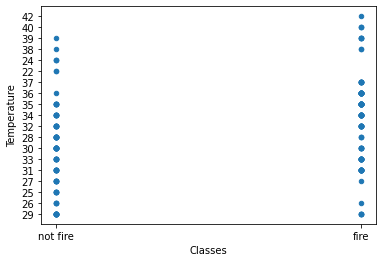

In [46]:
df.plot.scatter(x = 'Classes', y = 'Temperature')

In [201]:
!pip install cufflinks

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68736 sha256=74a27fa3bff8391ed86eb4dbbf6ef71d92fb07d96fc3c9f64d5bc079838e04b6
  Stored in directory: c:\users\subramanyam.medam\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


In [41]:
import plotly
import cufflinks as cf
cf.go_offline()

In [44]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'Humidity', ' Ws', 'Rain',
       'Fuel Moisture', 'Duff Moisture', 'Drought', 'Initial Speed Index',
       'Buildup Index', 'Fire Weather Index', 'Classes', 'Region'],
      dtype='object')

In [45]:
df.iplot()

In [46]:
df.iplot(x = 'Humidity', y = 'Rain', mode = 'markers')

In [47]:
df.iplot(x = 'day', y = 'Temperature', mode = 'markers')

In [48]:
df.iplot(kind = 'scatter')

In [49]:
import seaborn as sns

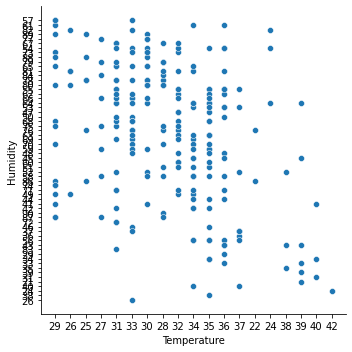

In [50]:
sns.relplot(x = 'Temperature', y = 'Humidity', data = df)

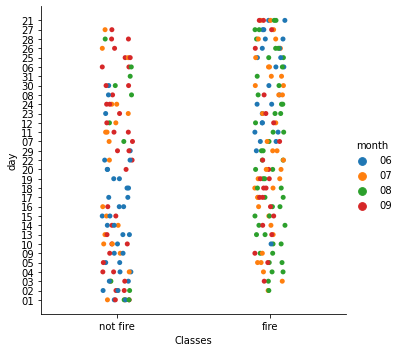

In [51]:
sns.catplot(x = 'Classes', y = 'day', data = df, hue = 'month')

In [52]:
df.iplot(kind = 'box', x = 'Humidity', y = 'Classes')

There are no outliers as per the above box plot

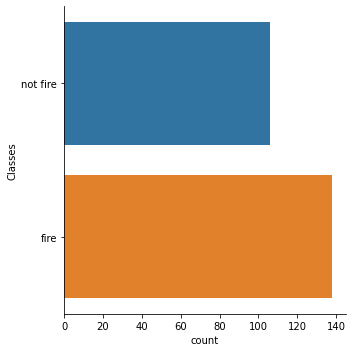

In [53]:
sns.catplot(y = 'Classes', kind = 'count', data = df)

Since there is no drastic difference between the ratio of both categories (fire and not fire), this dataset is a balanced dataset.

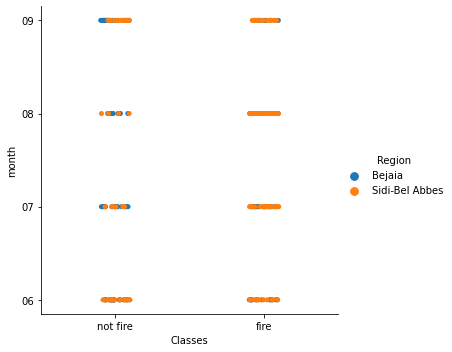

In [54]:
sns.catplot(x = 'Classes', y = 'month', data = df, hue = 'Region')

Since the output feature is not imbalanced since there is not much difference in counts.

### First we are doing several classification Algorithms. We have considered output feature as Classes.

#### Train/Test data split

In [47]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'Humidity', ' Ws', 'Rain',
       'Fuel Moisture', 'Duff Moisture', 'Drought', 'Initial Speed Index',
       'Buildup Index', 'Fire Weather Index', 'Classes', 'Region'],
      dtype='object')

In [48]:
x = df.iloc[:,:-2]
y = df.iloc[:,-2]

In [49]:
x

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [50]:
y

0      not fire
1      not fire
2      not fire
3      not fire
4      not fire
         ...   
241        fire
242    not fire
243    not fire
244    not fire
245    not fire
Name: Classes, Length: 244, dtype: object

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [52]:
x_train

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index
236,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6
229,14,09,2012,28,81,15,0,84.6,12.6,41.5,4.3,14.3,5.7
182,29,07,2012,34,59,16,0,88.1,19.5,47.2,7.4,19.5,10.9
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5
56,27,07,2012,36,48,13,0,90.3,22.2,108.5,8.7,29.4,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,09,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0
14,15,06,2012,28,80,17,3.1,49.4,3,7.4,0.4,3,0.1
92,01,09,2012,25,76,17,7.2,46,1.3,7.5,0.2,1.8,0.1
181,28,07,2012,33,57,16,0,87.5,15.7,37.6,6.7,15.7,9


#### Logistic Regression Classifier

In [61]:
from sklearn.linear_model import LogisticRegression
logregression = LogisticRegression()

In [62]:
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.5,1,2,3,5,6,7,9,10,30,45], 'penalty':['l1','l2', 'elasticnet']}
log_regressor = GridSearchCV(logregression, parameters, scoring = 'accuracy', cv = 5)
log_regressor.fit(x_train,y_train)

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\subramany

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.5, 1, 2, 3, 5, 6, 7, 9, 10, 30, 45],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [63]:
log_regressor.best_params_

{'C': 7, 'penalty': 'l2'}

In [64]:
log_regressor.best_score_

0.9647058823529411

The accuracy of this algorithm for the trained dataset is 96%

In [68]:
yl_pred = log_regressor.predict(x_test)

In [69]:
yl_pred

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'not fire', 'not fire', 'fire', 'not fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'not fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire'],
      dtype=object)

In [70]:
print('The accuracy of this model is : %d ' % ((((y_test == yl_pred).sum())/(x_test.shape[0]))*100))

The accuracy of this model is : 95 


In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_auc_score, f1_score

In [72]:
confusion_matrix(y_test, prediction_log)

array([[45,  2],
       [ 1, 26]], dtype=int64)

In [73]:
f1_score(y_test, prediction_log)

ValueError: pos_label=1 is not a valid label. It should be one of ['fire', 'not fire']

#### Naive Bayes Algorithm

In [74]:
from sklearn.naive_bayes import GaussianNB
gnbclass = GaussianNB()
gnbclass.fit(x_train, y_train)

GaussianNB()

In [75]:
yn_pred = gnbclass.predict(x_test)

In [76]:
yn_pred

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'not fire', 'not fire', 'fire', 'not fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'not fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'fire'],
      dtype='<U8')

In [77]:
x_test.shape

(74, 13)

In [78]:
confusion_matrix(y_test, yn_pred)

array([[44,  3],
       [ 1, 26]], dtype=int64)

In [79]:
(y_test != yn_pred).sum()

4

In [80]:
print("Number of mislabeled points out of a total %d points : %d" % (x_test.shape[0], (y_test != yn_pred).sum()))

Number of mislabeled points out of a total 74 points : 4


In [81]:
print('The accuracy of this model is : %d ' % ((((y_test == yn_pred).sum())/(x_test.shape[0]))*100))

The accuracy of this model is : 94 


The accuracy with Naive Bayes Algorithm is 94%

#### SVM Classifier Algorithm

In [82]:
from sklearn import svm

svmclass = svm.SVC()
svmclass.fit(x_train, y_train)

SVC()

In [83]:
ys_pred = svmclass.predict(x_test)

In [84]:
ys_pred

array(['fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire', 'fire'], dtype=object)

I don't think this is a good model as it has all 'fire' in predicted output. Hope this is worst fit model for this dataset.

In [85]:
print('The accuracy of this model is : %d ' % ((((y_test == ys_pred).sum())/(x_test.shape[0]))*100))

The accuracy of this model is : 63 


In [86]:
confusion_matrix(y_test, ys_pred)

array([[47,  0],
       [27,  0]], dtype=int64)

In [304]:
f1_score(y_test, ys_pred)

ValueError: pos_label=1 is not a valid label. It should be one of ['fire', 'not fire']

#### Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

dtclass = DecisionTreeClassifier(criterion = 'gini')
params = {'max_depth': [2,4,6,8,10,12], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2]}
dtgcv = GridSearchCV(estimator = dtclass, param_grid = params)
dtgcv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [88]:
dtgcv.best_score_

0.9764705882352942

In [89]:
dtgcv.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [90]:
yd_pred = dtgcv.predict(x_test)

In [91]:
yd_pred

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire',
       'fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire'], dtype=object)

In [92]:
confusion_matrix(y_test, yd_pred)

array([[45,  2],
       [ 0, 27]], dtype=int64)

In [93]:
print('The accuracy of this model is : %d ' % ((((y_test == yd_pred).sum())/(x_test.shape[0]))*100))

The accuracy of this model is : 97 


#### Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

rfclass = RandomForestClassifier(criterion = 'gini')
params = {'max_depth': [2,4,6,8,10,12], 'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2]}
rfgcv = GridSearchCV(estimator = rfclass, param_grid = params)
rfgcv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [95]:
rfgcv.best_score_

0.9764705882352942

In [96]:
rfgcv.best_params_

{'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [97]:
yr_pred = rfgcv.predict(x_test)

In [98]:
yr_pred

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire',
       'fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire'], dtype=object)

In [99]:
confusion_matrix(y_test, yr_pred)

array([[46,  1],
       [ 0, 27]], dtype=int64)

In [100]:
print('The accuracy of this model is : %d ' % ((((y_test == yr_pred).sum())/(x_test.shape[0]))*100))

The accuracy of this model is : 98 


Now we have completed all classification techniques to predict Classes columns (output feature). Out of all models, we have 'Random Forest' as the best fit for this dataset as Random Forest model has 98% accuracy with True Negative as only 1 and with no False Positive.

##### So we can conclude that Random Forest is the best fit for this dataset (Algerian Forest Fires) to predict 'Fire' or 'Not Fire' (Classes column).

### Now we will try to predict Temperature based on other columns using all Regression Techniques.

#### Train/Test Data Split

In [53]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'Humidity', ' Ws', 'Rain',
       'Fuel Moisture', 'Duff Moisture', 'Drought', 'Initial Speed Index',
       'Buildup Index', 'Fire Weather Index', 'Classes', 'Region'],
      dtype='object')

In [54]:
yr = df.iloc[:,3]

In [55]:
yr

0      29
1      29
2      26
3      25
4      27
       ..
241    30
242    28
243    27
244    24
245    24
Name: Temperature, Length: 244, dtype: object

In [56]:
xr = df.loc[:, df.columns != 'Temperature']

In [57]:
xr = xr.loc[:, xr.columns != 'Classes']

In [58]:
xr = xr.loc[:, xr.columns != 'Region']

In [59]:
xr

,day,month,year,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index
0,01,06,2012,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5
1,02,06,2012,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4
2,03,06,2012,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,04,06,2012,89,13,2.5,28.6,1.3,6.9,0,1.7,0
4,05,06,2012,77,16,0,64.8,3,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,65,14,0,85.4,16,44.5,4.5,16.9,6.5
242,27,09,2012,87,15,4.4,41.1,6.5,8,0.1,6.2,0
243,28,09,2012,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
244,29,09,2012,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [60]:
from sklearn.model_selection import train_test_split

xr_train, xr_test, yr_train, yr_test = train_test_split(xr, yr, test_size = 0.3, random_state = 42)

#### Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression

linregressor = LinearRegression()
linregressor.fit(xr_train, yr_train)

LinearRegression()

In [131]:
yrl_pred = linregressor.predict(xr_test)

In [132]:
yrl_pred

array([33.00345328, 35.02369093, 34.68710217, 33.14740046, 36.59955132,
       31.83744269, 35.36787224, 28.30628959, 31.47113651, 29.20437787,
       28.97902647, 32.74319299, 32.42314022, 32.54492354, 34.31238074,
       31.85772427, 36.9439969 , 25.48314435, 32.62485883, 33.51915143,
       31.07745274, 28.31043199, 34.40393581, 29.29108427, 36.76531437,
       25.34436363, 33.56480183, 33.56185631, 33.54745143, 35.31627304,
       33.94885058, 31.59443779, 32.57939011, 33.21448296, 32.38610134,
       31.67169829, 30.02663844, 34.42994411, 32.10771544, 22.08846244,
       33.99247888, 34.84569103, 31.30190098, 24.97982123, 36.17016696,
       32.79838649, 31.16469422, 30.61212797, 35.40348684, 34.28009218,
       37.14667157, 31.00707045, 30.86308821, 34.55292147, 33.55739709,
       32.40887727, 36.7290891 , 30.54794239, 30.81085588, 36.23362554,
       33.80870147, 28.60680794, 33.34061924, 31.69248015, 31.81913089,
       24.34986539, 33.42255561, 29.80926781, 36.89118971, 34.54

In [133]:
from sklearn.metrics import mean_squared_error, r2_score

yrl_mse = mean_squared_error(yr_test, yrl_pred)

In [134]:
yrl_mse

5.166390128580586

In [135]:
yrl_r2 = r2_score(yr_test, yrl_pred)

In [136]:
yrl_r2

0.5271015069936099

#### Ridge Regression

In [116]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters =  {'alpha':[1e-15, 1e-3, 1e-2,1,25,10,20, 30, 40, 50]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5, verbose = 1)
ridge_regressor.fit(xr_train, yr_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49107e-21): result may not be accurate.

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.49755e-21): result may not be accurate.

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.45216e-21): result may not be accurate.

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.87768e-21): result may not be accurate.

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning:

Ill-conditioned matrix (rcond=1.54041e-21): result may not be accurate.



GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 25, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [117]:
ridge_regressor.best_score_

-6.776956021195775

In [118]:
ridge_regressor.best_params_

{'alpha': 50}

In [119]:
yrr_pred = ridge_regressor.predict(xr_test)

In [120]:
yrr_mse = mean_squared_error(yr_test, yrr_pred)
yrr_r2 = r2_score(yr_test, yrr_pred)

In [121]:
yrr_mse

5.1965487459368696

In [122]:
yrr_r2

0.5243409789761756

#### Lasso Regression

In [124]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {'alpha':[1e015, 1e-10, 1e-8, 1e-3, 1e-1, 1,5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
lasso_regression = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
lasso_regression.fit(xr_train, yr_train)

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+02, tolerance: 1.974e-01

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.675e+02, tolerance: 1.934e-01

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.661e+02, tolerance: 1.782e-01

C:\Users\subramanyam.medam\Anac

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1000000000000000.0, 1e-10, 1e-08, 0.001, 0.1,
                                   1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [125]:
lasso_regression.best_params_

{'alpha': 0.1}

In [126]:
lasso_regression.best_score_

-6.753972592933762

In [137]:
yrls_pred = lasso_regression.predict(xr_test)

In [138]:
yrls_pred

array([32.86589174, 34.72500755, 34.59154049, 33.17015914, 36.44272997,
       31.77876388, 35.39894911, 28.10156982, 31.23424133, 29.28975654,
       29.19303835, 32.99165459, 32.58916726, 32.52225767, 34.46165886,
       31.73149806, 36.75202044, 25.42084639, 32.52091798, 33.34546112,
       31.01955882, 28.21155258, 34.47525695, 29.38989055, 36.75422729,
       25.69519635, 33.34729572, 33.59904135, 33.42102906, 35.17158023,
       34.0413331 , 31.54437466, 32.49266981, 33.28230112, 32.35464348,
       32.04780359, 30.21623199, 34.514659  , 31.4368784 , 22.89758879,
       33.97874764, 34.54956443, 31.75393829, 24.99635202, 36.03282222,
       32.78779212, 31.13181477, 30.60535282, 35.49113773, 34.38062895,
       37.10319194, 31.12239414, 30.88597817, 34.59438929, 33.55761916,
       32.67024547, 36.73907596, 31.00244955, 30.81835326, 36.36511198,
       33.70031351, 29.03911548, 33.27454374, 31.78529448, 32.03512918,
       24.62431376, 33.49330138, 30.03412668, 36.87707567, 34.72

In [139]:
yrls_mse = mean_squared_error(yr_test, yrls_pred)
yrls_r2 = r2_score(yr_test, yrls_pred)

In [140]:
yrls_mse

5.177500137683792

In [141]:
yrls_r2

0.5260845674223746

All the three algorithms Linear, Ridge and Lasso almost have the same MSE and R2. Let's analyse with other algorithms as well.

#### Elastic Net Regression

In [150]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

elastic = ElasticNet()
parameters = {'alpha':[1e015, 1e-10, 1e-8, 1e-3, 1e-1, 1,5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
enr = GridSearchCV(elastic, parameters, scoring = 'neg_mean_squared_error', cv = 5)
enr.fit(xr_train, yr_train)

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.016e+02, tolerance: 1.974e-01

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.677e+02, tolerance: 1.934e-01

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.673e+02, tolerance: 1.782e-01

C:\Users\subramanyam.medam\Anac

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1000000000000000.0, 1e-10, 1e-08, 0.001, 0.1,
                                   1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [151]:
enr.best_estimator_

ElasticNet(alpha=1)

In [152]:
enr.best_score_

-6.712112194708122

In [158]:
yre_pred = enr.predict(xr_test)

In [159]:
yre_pred

array([32.68458496, 34.248133  , 34.52043277, 33.3747923 , 36.09799862,
       31.36267836, 35.47784125, 27.62595247, 30.62519374, 29.28946646,
       29.64277926, 33.05114403, 32.78418352, 32.24050788, 34.59700687,
       31.70092226, 36.67275392, 25.0614048 , 32.37714578, 33.17141144,
       30.99304737, 28.12603504, 34.52000493, 29.52555777, 36.71921794,
       26.26882777, 32.91871478, 33.54427422, 33.43933275, 35.20620111,
       34.03118479, 31.4411906 , 32.53907403, 33.27701258, 32.33958079,
       32.52840901, 30.71970971, 34.43488269, 30.67420743, 24.54078767,
       33.80227579, 33.90955186, 32.47569044, 24.901282  , 35.93385205,
       32.80768042, 31.15068661, 30.40047845, 35.68236648, 34.48145473,
       37.02192226, 31.38116658, 30.91217905, 34.3324469 , 33.83884287,
       32.66553587, 36.87159682, 31.82110073, 30.86006859, 36.45237176,
       33.72926902, 29.82835012, 33.4118234 , 31.9576172 , 32.27535482,
       25.30536853, 33.63507011, 30.5390764 , 36.76758424, 34.98

In [160]:
yre_mse = mean_squared_error(yr_test, yre_pred)
yre_r2 = r2_score(yr_test, yre_pred)

In [161]:
yre_mse

5.4349830543274535

In [162]:
yre_r2

0.5025162188801148

The MSE of Elastic net is slightly higher than the above 3 algorithms and R2_score is slightly lesser to them. So we can say above 3 algorithms are slightly better than Elastic Net Algorithm.

#### SVR Regression

In [163]:
from sklearn.svm import SVR

svr = SVR()
parameters = {'degree' : [3,8],'coef0' : [0.01,10,0.5]}
svrgcv = GridSearchCV(svr, parameters, cv = 5)
svrgcv.fit(xr_train, yr_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'coef0': [0.01, 10, 0.5], 'degree': [3, 8]})

In [164]:
svrgcv.best_params_

{'coef0': 0.01, 'degree': 3}

In [165]:
svrgcv.best_score_

0.009793377099610857

In [166]:
yrs_pred = svrgcv.predict(xr_test)

In [167]:
yrs_pred

array([32.14519803, 32.08886459, 32.06771241, 32.30125541, 32.17734821,
       32.04702895, 32.11607647, 31.9911778 , 32.08521632, 32.0072056 ,
       32.04808082, 32.18836445, 32.05522029, 32.06024506, 32.32902561,
       32.07163008, 32.23705662, 31.97664963, 32.09031691, 32.0643012 ,
       32.03732653, 32.03565514, 32.09916158, 32.00949228, 32.14642668,
       31.99342942, 32.12207459, 32.18751463, 32.05036537, 32.13577871,
       32.14383671, 32.02250553, 32.1634208 , 32.30885989, 32.05021584,
       32.04494766, 32.05920142, 32.13933268, 32.02079682, 31.98782124,
       32.19769681, 32.07492492, 32.10309611, 31.97715003, 32.16079421,
       32.11410101, 32.09949222, 32.021637  , 32.13680188, 32.133376  ,
       32.40116848, 32.04833571, 32.08044557, 32.3645119 , 32.22099897,
       32.38779498, 32.23778846, 32.04972521, 32.01971354, 32.20752005,
       32.10098169, 32.03429495, 32.1518637 , 32.06144186, 32.10464728,
       31.98080192, 32.13696688, 32.10146587, 32.35602492, 32.07

In [168]:
yrs_mse = mean_squared_error(yr_test, yrs_pred)
yrs_r2 = r2_score(yr_test, yrs_pred)

In [169]:
yrs_mse

10.771600941082195

In [170]:
yrs_r2

0.014036159575995133

SVR has R2_score as 0.01 which is very low. So we can say it is not suitable for this dataset.

#### Decision Tree Regressor

In [171]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
parameters = {'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_depth': [2,4,6,8,10,12], 
              'min_samples_split':[2,3,4], 'min_samples_leaf':[1,2]}
dtrgcv = GridSearchCV(dtr, parameters, cv = 5)
dtrgcv.fit(xr_train, yr_train)

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


180 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    if np.any(y < 0):
TypeError: '<' not supported

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [172]:
dtrgcv.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=2, min_samples_split=3)

In [174]:
dtrgcv.best_score_

0.41691383586994

In [175]:
yrd_pred = dtrgcv.predict(xr_test)

In [176]:
yrd_pred

array([33. , 35. , 35. , 35. , 36. , 33. , 36. , 25.5, 31. , 33.5, 31. ,
       32. , 31.5, 33. , 35. , 35.5, 41. , 26.5, 36. , 35. , 31. , 30. ,
       36. , 30. , 41. , 28.5, 31. , 35. , 35. , 34.5, 31.5, 33.5, 33. ,
       33. , 35. , 31.5, 30. , 35. , 31. , 28.5, 35. , 35. , 30. , 26.5,
       34.5, 35. , 31. , 33.5, 35. , 31.5, 34.5, 30. , 31. , 35. , 30. ,
       36. , 41. , 31.5, 31. , 36. , 33. , 27.5, 35. , 30. , 35. , 25. ,
       35. , 28. , 34.5, 35. , 35. , 30. , 35. , 35. ])

In [178]:
yrd_mse = mean_squared_error(yr_test, yrd_pred)
yrd_r2 = r2_score(yr_test, yrd_pred)

In [179]:
yrd_mse

6.199324324324325

In [180]:
yrd_r2

0.43255328040117014

#### Random Forest Regressor

In [181]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor()
params = {'criterion': ['squared_error', 'absolute_error', 'poisson'], 'max_depth': [2,4,6,8,10,12], 'min_samples_split':[2,3,4],
          'min_samples_leaf':[1,2]}
rfregcv = GridSearchCV(rfreg, params, cv = 5)
rfregcv.fit(xr_train, yr_train)

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 354, in fit
    if np.any(y < 0):
TypeError: '<' not supported between instances of 'str' and 'int'


C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\model_selection\_se

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4]})

In [182]:
rfregcv.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_leaf=2)

In [183]:
rfregcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [184]:
rfregcv.best_score_

0.5860016670829944

In [185]:
rfregcv.best_index_

27

In [186]:
yrr_pred = rfregcv.predict(xr_test)

In [187]:
yrr_pred

array([32.47120998, 35.15042857, 35.37762734, 34.69455485, 35.53026587,
       32.47372619, 35.15658766, 26.74597619, 29.57835714, 30.69891667,
       29.48376984, 31.51865079, 31.52251984, 32.72645238, 35.26331776,
       31.90971864, 38.73870635, 26.49304762, 31.81436328, 34.03834524,
       30.10773016, 29.4200873 , 32.61557143, 30.20678571, 38.85189683,
       27.18788095, 31.62341071, 34.18407359, 34.51865476, 35.06355303,
       32.57869591, 31.03379365, 32.51416237, 32.70022835, 32.71617063,
       31.957     , 29.22261905, 35.95815622, 31.46040476, 27.64000397,
       35.47198956, 34.11738095, 31.271     , 26.88266667, 35.7334881 ,
       33.49164502, 31.04775   , 31.57067857, 35.19790115, 32.61702924,
       35.23771429, 29.87164286, 30.8331425 , 33.99867857, 34.35081169,
       33.47435714, 38.31737302, 30.73947222, 30.21040476, 34.25390476,
       32.71519048, 29.16402381, 34.96921791, 30.38708929, 33.0617619 ,
       25.8694881 , 34.06027201, 29.3017619 , 35.75488095, 34.59

In [188]:
yrr_mse = mean_squared_error(yr_test, yrr_pred)
yrr_r2 = r2_score(yr_test, yrr_pred)

In [189]:
yrr_mse

3.7676142774539225

In [190]:
yrr_r2

0.6551365518873769

Comparing all these algorithms/models in regression techniques to predict temperature, Random Forest Regressor is the best fit model to predict temperature and it has R2_Score as 0.65 which we can say that 65% of accuracy.

##### The conclusion here is that Random Forest Regressor is the best fit for this dataset (Algerian Forest Fires) to predict temperature.

### Pickling

Since we have finalised the best model in regression and classification techniques to predict temperature and Classes columns respectively, we are going to create pickle file for both and use them in APIs which we are going to create.

In [191]:
import pickle

pickle.dump(rfgcv, open('rfclmodel.pkl', 'wb'))
pickle.dump(rfregcv, open('rfregmodel.pkl', 'wb'))

In [192]:
class_pickled_model = pickle.load(open('rfclmodel.pkl', 'rb'))
class_pickled_model.predict(x_test)

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire',
       'fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'fire'], dtype=object)

In [194]:
reg_pickled_model = pickle.load(open('rfregmodel.pkl', 'rb'))
reg_pickled_model.predict(xr_test)

array([32.47120998, 35.15042857, 35.37762734, 34.69455485, 35.53026587,
       32.47372619, 35.15658766, 26.74597619, 29.57835714, 30.69891667,
       29.48376984, 31.51865079, 31.52251984, 32.72645238, 35.26331776,
       31.90971864, 38.73870635, 26.49304762, 31.81436328, 34.03834524,
       30.10773016, 29.4200873 , 32.61557143, 30.20678571, 38.85189683,
       27.18788095, 31.62341071, 34.18407359, 34.51865476, 35.06355303,
       32.57869591, 31.03379365, 32.51416237, 32.70022835, 32.71617063,
       31.957     , 29.22261905, 35.95815622, 31.46040476, 27.64000397,
       35.47198956, 34.11738095, 31.271     , 26.88266667, 35.7334881 ,
       33.49164502, 31.04775   , 31.57067857, 35.19790115, 32.61702924,
       35.23771429, 29.87164286, 30.8331425 , 33.99867857, 34.35081169,
       33.47435714, 38.31737302, 30.73947222, 30.21040476, 34.25390476,
       32.71519048, 29.16402381, 34.96921791, 30.38708929, 33.0617619 ,
       25.8694881 , 34.06027201, 29.3017619 , 35.75488095, 34.59

##### Pickle files for both Random Forest Classifier and Regressor are created now. We can use both of them in APIs and predict values using API.

### Boosting Techniques

##### ADA Boost

In [49]:
x_train

,day,month,year,Temperature,Humidity,Ws,Rain,Fuel Moisture,Duff Moisture,Drought,Initial Speed Index,Buildup Index,Fire Weather Index
236,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6
229,14,09,2012,28,81,15,0,84.6,12.6,41.5,4.3,14.3,5.7
182,29,07,2012,34,59,16,0,88.1,19.5,47.2,7.4,19.5,10.9
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5
56,27,07,2012,36,48,13,0,90.3,22.2,108.5,8.7,29.4,15.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,15,09,2012,24,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0
14,15,06,2012,28,80,17,3.1,49.4,3,7.4,0.4,3,0.1
92,01,09,2012,25,76,17,7.2,46,1.3,7.5,0.2,1.8,0.1
181,28,07,2012,33,57,16,0,87.5,15.7,37.6,6.7,15.7,9


In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

ada = AdaBoostClassifier()
params = {'learning_rate': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0]}
adaclass = GridSearchCV(ada, params, cv = 5)
adaclass.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0]})

In [58]:
ya_pred = adaclass.predict(x_test)

In [59]:
ya_pred

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'not fire', 'not fire', 'fire', 'not fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'not fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire'],
      dtype=object)

In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, ya_pred)

array([[45,  2],
       [ 1, 26]], dtype=int64)

In [54]:
print('The accuracy of this model is : %d ' % ((((y_test == ya_pred).sum())/(x_test.shape[0]))*100))

The accuracy of this model is : 95 


##### Gradient Boost

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

grad = GradientBoostingClassifier()
params = {'learning_rate': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0], 'criterion': ['friedman_mse', 'squared_error', 'mse']}
gradclass = GridSearchCV(grad, params, cv = 5)
gradclass.fit(x_train, y_train)

C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:471: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\subramanyam.medam\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\subramanyam.

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0]})

In [63]:
yg_pred = gradclass.predict(x_test)

In [64]:
yg_pred

array(['fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'not fire', 'not fire', 'not fire', 'not fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'fire',
       'not fire', 'not fire', 'fire', 'not fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'not fire', 'not fire', 'not fire', 'fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'fire', 'fire', 'fire', 'fire', 'fire', 'fire', 'fire'],
      dtype=object)

In [65]:
confusion_matrix(y_test, yg_pred)

array([[45,  2],
       [ 1, 26]], dtype=int64)

In [66]:
print('The accuracy of this model is : %d ' % ((((y_test == ya_pred).sum())/(x_test.shape[0]))*100))

The accuracy of this model is : 95 


### Boost Regression Techniques

##### ADA Boost Regression

In [61]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

adar = AdaBoostRegressor()
params = {'learning_rate': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0]}
adareg = GridSearchCV(adar, params, cv = 5)
adareg.fit(xr_train, yr_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0]})

In [64]:
yar_pred = adareg.predict(xr_test)

In [65]:
yar_pred

array([32.55769231, 33.78461538, 34.96428571, 34.32075472, 36.45454545,
       31.33333333, 35.32352941, 27.375     , 29.36363636, 29.36363636,
       29.1025641 , 32.2247191 , 32.        , 33.20289855, 34.29310345,
       32.82352941, 38.21428571, 27.375     , 32.2247191 , 33.41935484,
       30.86956522, 28.27777778, 33.01020408, 29.36363636, 38.09302326,
       26.5       , 30.64583333, 33.50877193, 33.97435897, 35.11111111,
       33.19512195, 30.7037037 , 32.55769231, 33.41935484, 33.25274725,
       31.80681818, 29.3956044 , 34.76666667, 30.25490196, 26.92857143,
       34.32075472, 33.25274725, 30.54929577, 27.92307692, 36.54054054,
       33.16666667, 32.08247423, 30.64583333, 35.55813953, 33.20289855,
       36.1627907 , 29.7173913 , 31.35384615, 33.41935484, 34.29310345,
       33.375     , 37.42105263, 31.75      , 30.125     , 33.375     ,
       32.09090909, 28.52777778, 34.29310345, 30.14814815, 32.08247423,
       26.30769231, 32.12121212, 29.61904762, 36.1627907 , 35.54

In [70]:
adareg.best_params_

{'learning_rate': 1.0}

In [71]:
adareg.best_score_

0.5564227557963228

In [67]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

yar_mse = mean_squared_error(yr_test, yar_pred)
yar_r2 = r2_score(yr_test, yar_pred)

In [68]:
yar_mse

4.110041805618588

In [69]:
yar_r2

0.6237929138726722

We have got 0.62 as R2_Score using ADA Boost Regression which would be around 62% accuracy. Let's check for Gradient Boost regressor as well.

##### Gradient Boost Regressor

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

gradr = GradientBoostingRegressor()
params = {'learning_rate': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0]}
gradreg = GridSearchCV(gradr, params, cv = 5)
gradreg.fit(xr_train, yr_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0]})

In [74]:
ygr_pred = gradreg.predict(xr_test)

In [75]:
ygr_pred

array([32.46022008, 34.20173514, 35.15450058, 35.65345276, 37.81935054,
       31.95279138, 35.0508128 , 26.56402554, 29.03034085, 30.37858696,
       29.84699743, 29.99698448, 31.30322226, 32.43514477, 35.88551682,
       32.483556  , 40.19625776, 27.32023253, 31.48551775, 34.09452118,
       30.89919047, 29.34291686, 31.70573025, 31.56216712, 38.77544184,
       25.90313973, 29.93082033, 33.85306923, 36.10796328, 33.98466072,
       32.41073661, 30.6069004 , 31.05986708, 33.24513388, 33.18345171,
       31.24546491, 28.93715569, 35.10409235, 33.07686224, 26.96575673,
       36.19671819, 32.67953949, 30.14486985, 28.23879725, 36.89662316,
       33.60665596, 30.26511538, 31.9005588 , 36.01969379, 31.51164913,
       37.10867335, 30.00105411, 30.52567489, 34.5393814 , 33.58864191,
       33.19320485, 37.52021438, 28.42822665, 32.08715233, 32.94767281,
       31.82387801, 27.59788237, 34.4535395 , 30.12987682, 33.25244827,
       24.93223925, 33.01961194, 28.03866973, 36.92250962, 35.70

In [76]:
gradreg.best_params_

{'learning_rate': 0.1}

In [77]:
gradreg.best_score_

0.6129903335489996

In [78]:
ygr_mse = mean_squared_error(yr_test, ygr_pred)
ygr_r2 = r2_score(yr_test, ygr_pred)

In [79]:
ygr_mse

3.870001901699953

In [80]:
ygr_r2

0.6457646399714343

Here we have got R2_Score as 0.64 for Gradient Boost Regression. So we can say around 64% accuracy. Comparing both ADA Boost and Gradient Boost regressors, we can say that Gradient Boost Regressor is the best fit.

But when we compare Boost techniques with other Regression techniques, Random Forest Regressor and Random Forest Classifier has better accuracy compare to Boost Techniques. So even after considering Boosing techniques, Random Forest algorithm gives more accuracy for predicting Temperature and Class of this dataset (Algerian Forest Fires).